# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [70]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

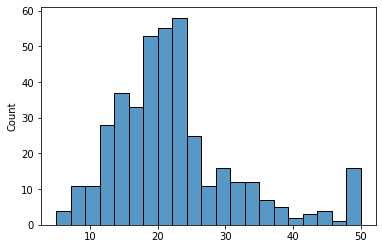

In [71]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [72]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [73]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from numpy import mean
y_mean = a = np.full(102, mean(y_train))

mean(abs(y_test - y_mean))

6.533042127742185

❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [93]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = models.Sequential()
    
    model.compile(loss = "MSE",
              metrics = ["MAE"],
                 optimizer = "adam")
    
    model.add(layers.Dense(10, activation='relu', input_dim=13))
    model.add(layers.Dense(7, activation='relu'))

    model.add(layers.Dense(1, activation='linear'))
    
    return model
model = initialize_model()
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 10)                140       
                                                                 
 dense_85 (Dense)            (None, 7)                 77        
                                                                 
 dense_86 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [94]:
def compile_model(model, optimizer_name):
    
    model.compile(loss = "MSE",
                 metrics = ["MAE"],
                 optimizer = optimizer_name)
    
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

model = compile_model(model, "adam")

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

# Train the model
model.fit(X_train, y_train, callbacks=[early_stopping], epochs=500, batch_size = 8)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/500
51/51 [==============================] - 1s 1ms/step - loss: 596.8887 - MAE: 22.5986
Epoch 2/500
51/51 [==============================] - 0s 1ms/step - loss: 574.4128 - MAE: 22.1404
Epoch 3/500
51/51 [==============================] - 0s 1ms/step - loss: 549.4648 - MAE: 21.6368
Epoch 4/500
51/51 [==============================] - 0s 1ms/step - loss: 512.1432 - MAE: 20.8690
Epoch 5/500
51/51 [==============================] - 0s 1ms/step - loss: 454.9066 - MAE: 19.6137
Epoch 6/500
51/51 [==============================] - 0s 1ms/step - loss: 380.3989 - MAE: 17.7920
Epoch 7/500
51/51 [==============================] - 0s 1ms/step - loss: 303.5247 - MAE: 15.5700
Epoch 8/500
51/51 [==============================] - 0s 1ms/step - loss: 240.5365 - MAE: 13.2314
Epoch 9/500
51/51 [==============================] - 0s 1ms/step - loss: 198.3074 - MAE: 11.5446
Epoch 10/500
51/51 [==============================] - 0s 1ms/step - loss: 171.8059 - MAE: 10.5583
Epoch 11/500
51/51 [=========

51/51 [==============================] - 0s 1ms/step - loss: 12.2337 - MAE: 2.4429
Epoch 87/500
51/51 [==============================] - 0s 2ms/step - loss: 12.1174 - MAE: 2.4298
Epoch 88/500
51/51 [==============================] - 0s 1ms/step - loss: 12.0327 - MAE: 2.4234
Epoch 89/500
51/51 [==============================] - 0s 1ms/step - loss: 11.9460 - MAE: 2.4127
Epoch 90/500
51/51 [==============================] - 0s 1ms/step - loss: 11.7903 - MAE: 2.3999
Epoch 91/500
51/51 [==============================] - 0s 1ms/step - loss: 11.7562 - MAE: 2.3922
Epoch 92/500
51/51 [==============================] - 0s 1ms/step - loss: 11.6775 - MAE: 2.3812
Epoch 93/500
51/51 [==============================] - 0s 2ms/step - loss: 11.5576 - MAE: 2.3714
Epoch 94/500
51/51 [==============================] - 0s 1ms/step - loss: 11.4564 - MAE: 2.3509
Epoch 95/500
51/51 [==============================] - 0s 983us/step - loss: 11.3440 - MAE: 2.3450
Epoch 96/500
51/51 [==============================]

51/51 [==============================] - 0s 1ms/step - loss: 7.2850 - MAE: 1.8625
Epoch 172/500
51/51 [==============================] - 0s 1ms/step - loss: 7.2014 - MAE: 1.8729
Epoch 173/500
51/51 [==============================] - 0s 963us/step - loss: 7.1872 - MAE: 1.8656
Epoch 174/500
51/51 [==============================] - 0s 1ms/step - loss: 7.1526 - MAE: 1.8613
Epoch 175/500
51/51 [==============================] - 0s 1ms/step - loss: 7.1961 - MAE: 1.8812
Epoch 176/500
51/51 [==============================] - 0s 1ms/step - loss: 7.0885 - MAE: 1.8461
Epoch 177/500
51/51 [==============================] - 0s 1ms/step - loss: 7.0512 - MAE: 1.8657
Epoch 178/500
51/51 [==============================] - 0s 1ms/step - loss: 7.0525 - MAE: 1.8471
Epoch 179/500
51/51 [==============================] - 0s 1ms/step - loss: 7.0441 - MAE: 1.8461
Epoch 180/500
51/51 [==============================] - 0s 1ms/step - loss: 6.9836 - MAE: 1.8484
Epoch 181/500
51/51 [==============================]

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [127]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['MAE'])
    ax2.plot(history.history['val_MAE'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 0s/step - loss: 19.1983 - MAE: 2.8892
MAE with the rmsprop optimizer: 2.8892  reached in 18 s after 289 epochs


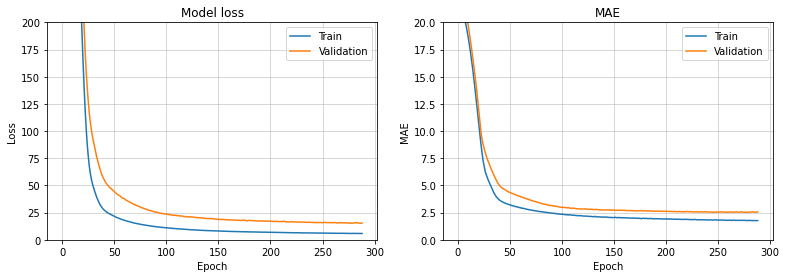

4/4 [==============================] - 0s 0s/step - loss: 23.6316 - MAE: 3.1178
MAE with the adam optimizer: 3.1178  reached in 16 s after 304 epochs


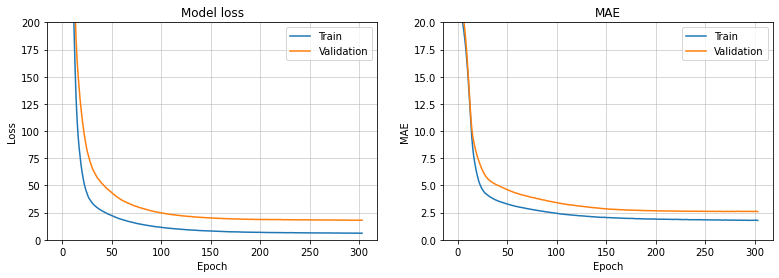

4/4 [==============================] - 0s 0s/step - loss: 362.7327 - MAE: 16.7029
MAE with the adagrad optimizer: 16.7029  reached in 26 s after 500 epochs


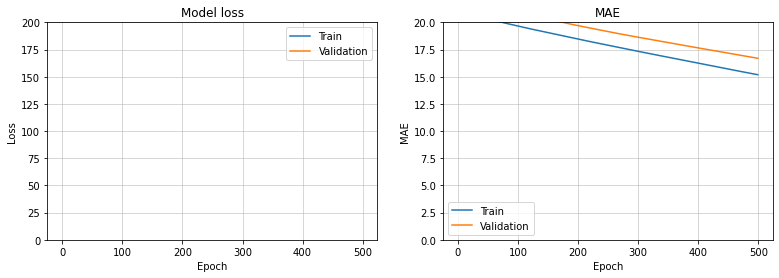

In [97]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

Oui elles sont meilleures ! Sauf pour adagrad.

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

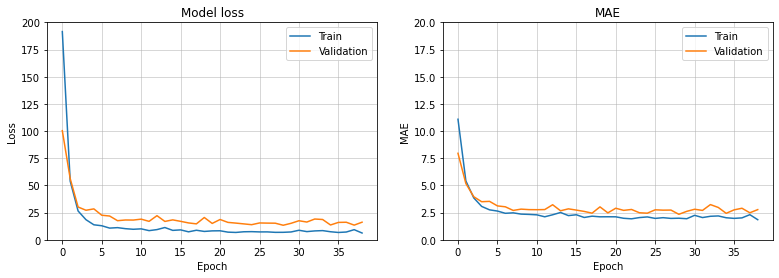

In [98]:
# YOUR CODE HERE
def compile_model_2(model, optimizers, learning_rate):
    
    if optimizers == "adam":
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizers == "rmsprop":
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizers == "adagrad":
        opt = keras.optimizers.Adagrad(learning_rate=learning_rate)
    
    model.compile(loss = "MSE",
                 metrics = ["MAE"],
                 optimizer = opt)
    
    return model

model = initialize_model()
model = compile_model_2(model, "adam", 0.1)

es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    batch_size=16, 
                    epochs=500, 
                    validation_split=0.3,
                    callbacks=[es], verbose=0)

plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

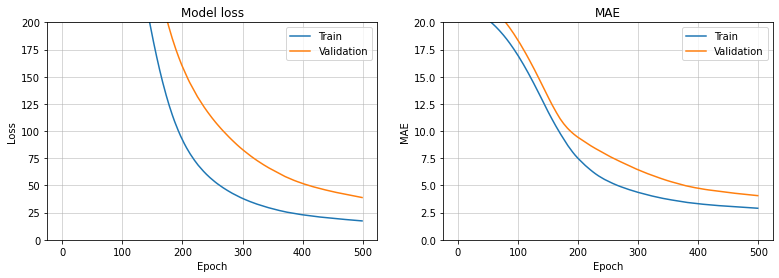

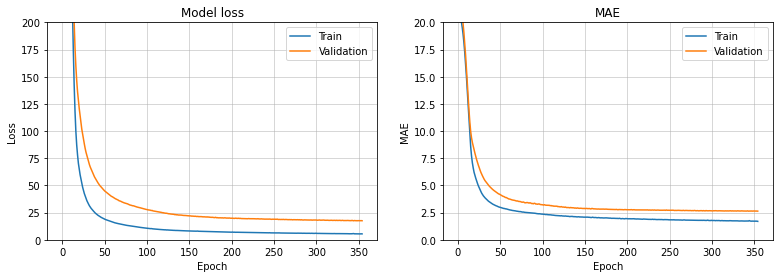

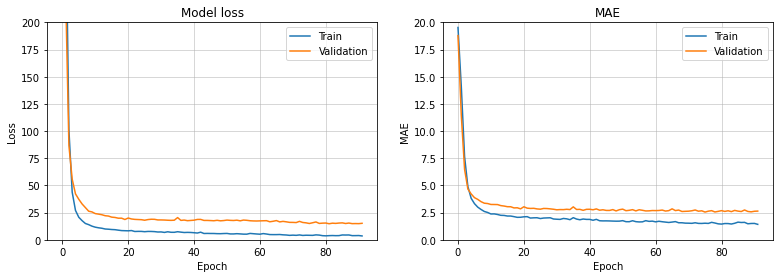

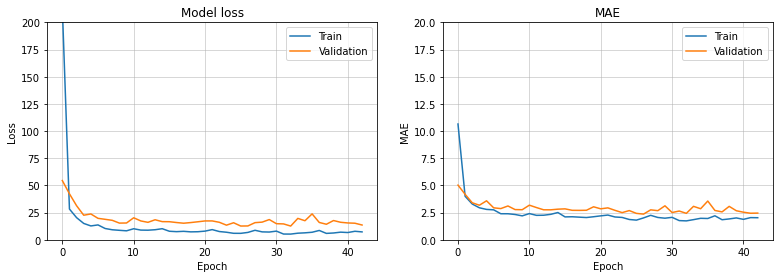

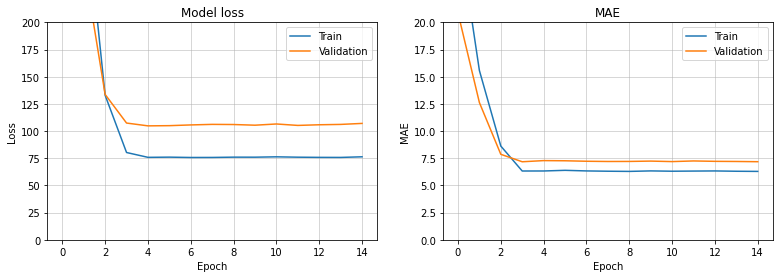

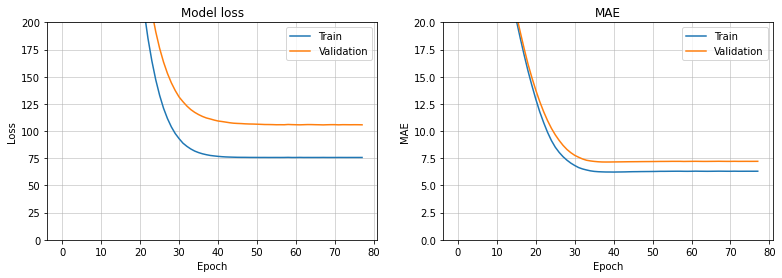

In [99]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    model = initialize_model()
    model = compile_model_2(model, "adam", lr)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                    batch_size=16, 
                    epochs=500, 
                    validation_split=0.3,
                    callbacks=[es], verbose=0)

    plot_loss_mae(history)

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

4/4 [==============================] - 0s 2ms/step - loss: 22.0615 - MAE: 3.1579


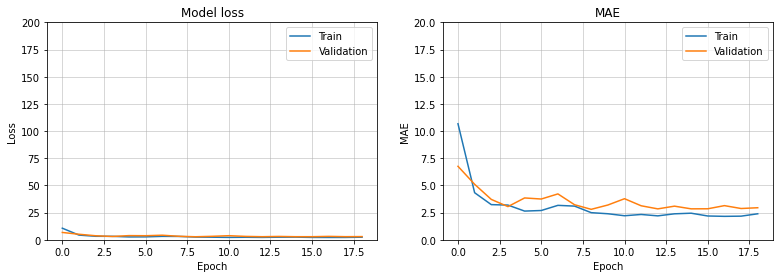

MAE loss : 3.2193


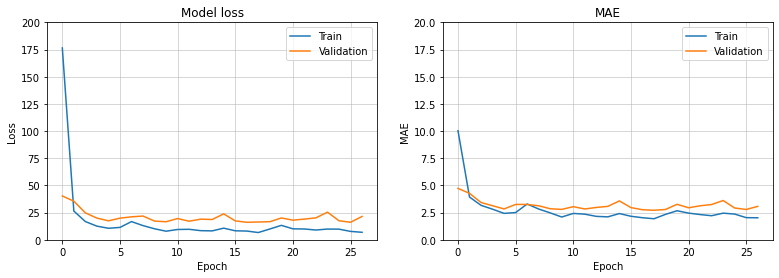

MSE loss : 3.1579


In [137]:
# YOUR CODE HERE
def compile_model_3(model, optimizers, learning_rate, loss, metrics):
    
    if optimizers == "adam":
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizers == "rmsprop":
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizers == "adagrad":
        opt = keras.optimizers.Adagrad(learning_rate=learning_rate)
    
    model.compile(loss = loss,
                 metrics = metrics,
                 optimizer = opt)
    
    return model

model = compile_model_3(initialize_model(), "adam", 0.1, loss = "MAE", metrics = ["MAE"])
model_2 = compile_model_3(initialize_model(), "adam", 0.1, loss = "MSE", metrics = ["MAE"])
es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[es], verbose=0)

history_2 = model_2.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]
res_2 = model_2.evaluate(X_test, y_test)[1]

plot_loss_mae(history)
print(f'MAE loss : {res:.4f}')

plot_loss_mae(history_2)
print(f'MSE loss : {res_2:.4f}')

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

Le MSE est plus sensible aux erreurs plus importantes que le MAE. La fonction de perte MSE punit plus sévèrement les erreurs importantes que la fonction de perte MAE, ce qui peut conduire à un modèle plus robuste aux erreurs importantes et donc à une meilleure performance en termes de MAE.

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

4/4 [==============================] - 0s 2ms/step - loss: 2.8452 - MAE: 2.8452


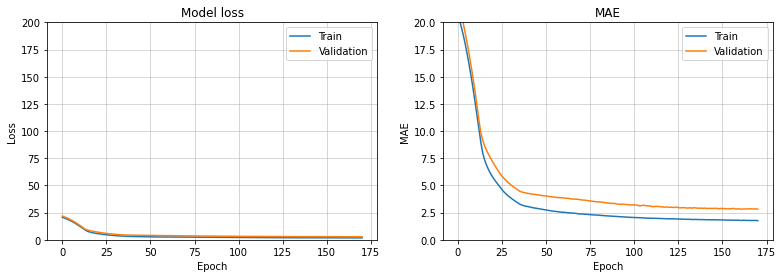

MAE loss : 2.8452


In [151]:
# YOUR CODE HERE
model = initialize_model()
mae_test = compile_model_3(model, "rmsprop", 0.001, "MAE", ["MAE"])
es = EarlyStopping(patience=10, restore_best_weights=True)

history = mae_test.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[es], verbose=0)

res = mae_test.evaluate(X_test, y_test)[1]

plot_loss_mae(history)
print(f'MAE loss : {res:.4f}')

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

In [154]:
mae_test.save("mae_test")

INFO:tensorflow:Assets written to: mae_test\assets


❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

4/4 [==============================] - 0s 2ms/step - loss: 2.8946 - MAE: 2.8946


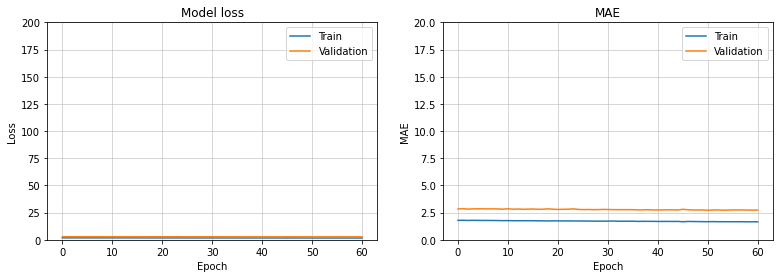

MAE loss : 2.8946


In [156]:
# YOUR CODE
loaded_model = keras.models.load_model('mae_test')

es = EarlyStopping(patience=10, restore_best_weights=True)

history = mae_test.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[es], verbose=0)

res = mae_test.evaluate(X_test, y_test)[1]

plot_loss_mae(history)
print(f'MAE loss : {res:.4f}')

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [158]:
# YOUR CODE HERE
from tensorflow.keras.optimizers.schedules import ExponentialDecay

4/4 [==============================] - 0s 2ms/step - loss: 2.8300 - MAE: 2.8300


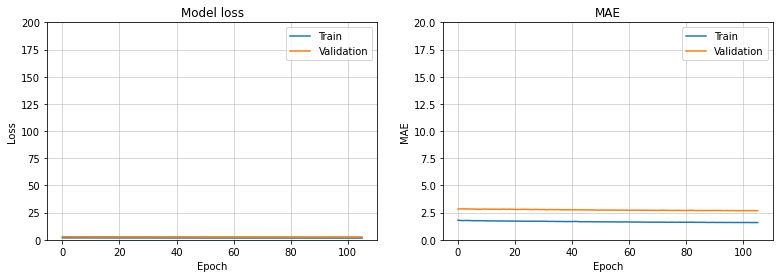

MAE loss : 2.8300


In [163]:
initial_learning_rate = 0.001

lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=2000, decay_rate=0.7
)

mae_test = compile_model_3(loaded_model, "adam", lr_schedule, "MAE", ["MAE"])

history = mae_test.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[es], verbose=0)

res = mae_test.evaluate(X_test, y_test)[1]

plot_loss_mae(history)
print(f'MAE loss : {res:.4f}')